# Brainstorm Questions
* What are the characteristics of Hall of Famers?
* What separates people who get inducted vs people who were simply nominated?
* What are the characteristics of players with the highest salaries? Did these characteristics change with the advent of Moneyball/Sabermetrics?
* How do high salary vs HoF differ?
* Did people play more positions in the past?

## Salary 
* Players with high salaries are usually on multi-year contracts.
* For a given year, a player's current salary is dictated by past performance prior to signing that contract. 
* Let Year_Start the starting season for a player's contract, Year_End the ending season for a player's contract. Stats accumulated during [Year_Start, Year_End] do not have an effect on their current salary.
* A player may be more motivated to play well closer to Year_End.
* If looking for features that correlate with salary, best to look at data for years prior to that contract signing.

## Hall of Fame 
* I guess that the Hall of Fame will reward players with high-performance over a long period of time.
* The Hall of Fame currently describes baseball as having four eras:
  * Today's Game (1988–present)
  * Modern Baseball (1970–1987)
  * Golden Days (1950–1969)
  * Early Baseball (1871–1949)
* The characteristics for being a Hall of Famer may differ between these eras.
* Some players will have careers that span different eras.
* Players are currently inducted into the Hall through election either by the Baseball Writers' Association of America (BBWAA), or the Veterans Committee, which now consists of four subcommittees. Each of those subcommittees focus on a specific era of baseball (outlined above).
* The Veterans Committee provides a path to enshirement for players who are no longer eligible for consideration by the BBWAA.
* Each player needs to have played at least 10 seasons.
* There are 247 inducted players.
* There are 941 non-inducted players in the dataset.

### VotedBy
* In the dataset, votedBy Old Timers refers to the Old-Timers Committee. This was the original Veterans Committee, formed by Commissioner Landis to put players from the 19th century in the Hall of Fame.
* By 1953, the Old-Timers Committee hadn't met for seven years, so a Committee on Baseball Veterans was formed. This is what votedBy Veterans means.
* Run off elections occur when the initial voting by the BBWAA doesn't produce a winner. This is what votedBy Run Off means.
* There is a special committee to consider players who played in the Negro League. This is what votedBy Negro League means.
* My methodology for figuring this out: Wikipedia article on Baseball Hall of Fame and Veterans Committee, then looking at players in each category and reading their Wikipedia bios.

## What Separates Good to Great?
* Number of games played, longevity.

Guesses:
* All-Star Appearances
* World Series Championships
* MVPs
* Hitters: Batting Average, OBP
* Pitchers: ERA, Wins
* Closers: Saves (Only 5 relief pitchers in the Hall, so not worth looking at)

Next steps:
* Awards
* Break down by eras
* Break down by BBWAA vs not?

### Who are all the Hall of Fame Players?
There is a table called HallOfFame. Join that with Master to get the names

In [390]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import display

%pylab inline
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


/Users/hkwik/anaconda/envs/DAND/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [391]:
hof_df = pd.read_csv('baseballdatabank-master/core/HallOfFame.csv')
master_df = pd.read_csv('baseballdatabank-master/core/Master.csv')

hof_cols = list(hof_df.columns)
hof_cols.extend(['nameLast', 'nameFirst'])

hof_df = hof_df.merge(master_df, on='playerID')
hof_df = hof_df[hof_cols]

hof_df.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus
3,wagneho01,1936,Veterans,78.0,59.0,5.0,N,Player,NaN,Wagner,Honus
4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy


In [392]:
players = hof_df.loc[(hof_df.category == 'Player')]
inducted_players = hof_df.loc[(hof_df.inducted == 'Y') & (hof_df.category == 'Player')]

## Inducted vs. Non-Inducted Players

In [395]:
display(inducted_players.shape)
inducted_players.head()

(247, 11)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus
4,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy
5,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,Johnson,Walter


In [396]:
non_inducted_ids = set(players.playerID).difference(inducted_players.playerID)
non_inducted_players = players.loc[hof_df.playerID.isin(non_inducted_ids)]

non_inducted_players = non_inducted_players.groupby('playerID', as_index=False).last()

display(non_inducted_players.shape)
non_inducted_players.head()

(941, 11)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst
0,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN,Abbott,Jim
1,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,Top 20,Adams,Babe
2,adamsbo03,1966,BBWAA,302.0,227.0,1.0,N,Player,NaN,Adams,Bobby
3,adamssp01,1960,BBWAA,269.0,202.0,1.0,N,Player,NaN,Adams,Sparky
4,ageeto01,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,Agee,Tommie


In [397]:
appearances = pd.read_csv("baseballdatabank-master/core/Appearances.csv")
appearances.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,BS1,NaN,barnero01,31.0,NaN,31,31.0,0,0,0,16,0,15,0,0,0,0,NaN,NaN,NaN
1,1871,BS1,NaN,barrofr01,18.0,NaN,18,18.0,0,0,0,1,0,0,13,0,4,17,NaN,NaN,NaN
2,1871,BS1,NaN,birdsda01,29.0,NaN,29,29.0,0,7,0,0,0,0,0,0,27,27,NaN,NaN,NaN
3,1871,BS1,NaN,conefr01,19.0,NaN,19,19.0,0,0,0,0,0,0,18,0,1,18,NaN,NaN,NaN
4,1871,BS1,NaN,gouldch01,31.0,NaN,31,31.0,0,0,30,0,0,0,0,0,1,1,NaN,NaN,NaN


In [398]:
appearances_total = appearances.groupby('playerID', as_index=False).sum()

del appearances_total['yearID']
appearances_total.head()

,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,aardsda01,331.0,0.0,139,331.0,331,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,aaronha01,3298.0,288.0,3298,3057.0,0,0,210,43,7,0,313,293,2184,2760,196.0,46.0,0.0
2,aaronto01,437.0,NaN,437,437.0,0,0,232,7,10,0,136,1,2,138,NaN,NaN,NaN
3,aasedo01,448.0,0.0,81,448.0,448,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,abadan01,15.0,4.0,15,9.0,0,0,8,0,0,0,0,0,1,1,0.0,7.0,1.0


In [399]:
inducted_players = pd.merge(inducted_players, appearances_total, on='playerID')
inducted_players.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,Cobb,Ty,3034.0,NaN,3034,3034.0,3,0,14,2,1,0,35,2194,706,2934,NaN,NaN,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Ruth,Babe,2503.0,NaN,2503,2503.0,163,0,32,0,0,0,1057,64,1131,2241,NaN,NaN,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,Wagner,Honus,2794.0,NaN,2794,2794.0,2,0,248,57,210,1887,35,67,272,373,NaN,NaN,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,Mathewson,Christy,647.0,NaN,647,647.0,636,0,3,0,0,0,1,0,3,4,NaN,NaN,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,Johnson,Walter,934.0,NaN,934,934.0,802,0,0,0,0,0,2,7,4,13,NaN,NaN,NaN


In [400]:
non_inducted_players = pd.merge(non_inducted_players, appearances_total, on='playerID')
non_inducted_players.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN,Abbott,Jim,263.0,13.0,18,263.0,263,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,adamsba01,1955,BBWAA,251.0,189.0,24.0,N,Player,Top 20,Adams,Babe,482.0,NaN,482,482.0,482,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,adamsbo03,1966,BBWAA,302.0,227.0,1.0,N,Player,NaN,Adams,Bobby,1281.0,NaN,1281,1281.0,0,0,12,399,652,0,0,0,3,3,NaN,NaN,NaN
3,adamssp01,1960,BBWAA,269.0,202.0,1.0,N,Player,NaN,Adams,Sparky,1424.0,NaN,1424,1424.0,0,0,0,551,532,297,2,0,2,4,NaN,NaN,NaN
4,ageeto01,1979,BBWAA,432.0,324.0,0.0,N,Player,NaN,Agee,Tommie,1129.0,NaN,1129,1129.0,0,0,0,0,0,0,64,934,124,1073,NaN,NaN,NaN


In [401]:
def plot_total_games(df, title, bins=50):
    ax = df['G_all'].hist(bins=bins)
    ax.set_xlabel("Total games played")
    ax.set_ylabel("Count")
    ax.set_title(title)

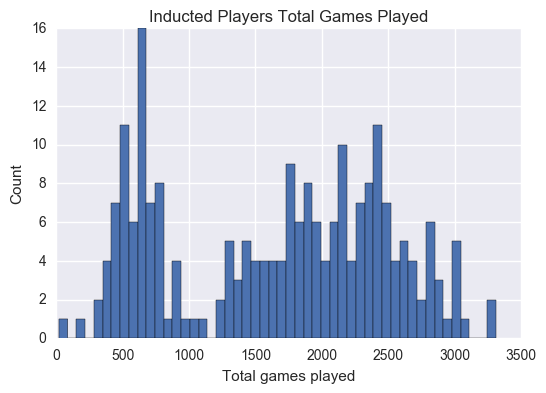

In [402]:
plot_total_games(inducted_players, "Inducted Players Total Games Played")

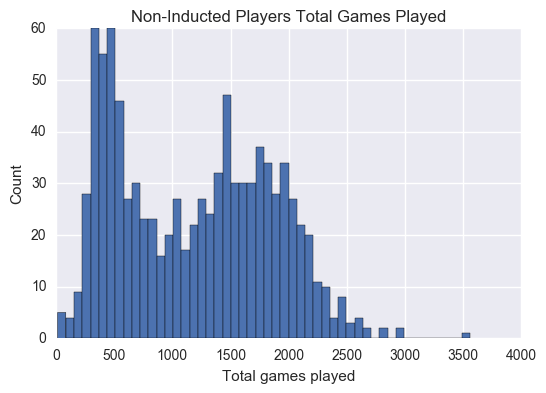

In [403]:
plot_total_games(non_inducted_players, "Non-Inducted Players Total Games Played")

* Inducted players may have longer careers
* Both distributions look like they could be bimodal. My guess is that this is because pitchers appear in fewer games per season compared to batters.
* We should look at these distributions by position.

In [404]:
position_cols = ['G_p',
 'G_c',
 'G_1b',
 'G_2b',
 'G_3b',
 'G_ss',
 'G_lf',
 'G_cf',
 'G_rf',
 'G_of',
 'G_dh',
 'G_ph',
 'G_pr']

def most_played_position(df):
    return df[position_cols].idxmax(axis=1).str.split('_').str[1].str.upper()

In [405]:
inducted_players.insert(1, 'Position', most_played_position(inducted_players))
non_inducted_players.insert(1, 'Position', most_played_position(non_inducted_players))

In [406]:
inducted_positions = set(inducted_players.Position.unique())
non_inducted_positions = set(non_inducted_players.Position.unique())

display(sorted(inducted_positions))
display(sorted(non_inducted_positions))

non_inducted_positions.difference(inducted_positions)

['1B', '2B', '3B', 'C', 'DH', 'OF', 'P', 'SS']

['1B', '2B', '3B', 'C', 'CF', 'DH', 'LF', 'OF', 'P', 'PH', 'SS']

{'CF', 'LF', 'PH'}

Since I used argmax, this doesn't indicate whether an Outfielder primary played Left Field, Center Field, or Right Field. The two players in non_inducted who have CF and LF actually only played games in Center and Left respectively and never played other positions. 

In [407]:
display(non_inducted_players.loc[non_inducted_players.Position == 'CF'])
display(non_inducted_players.loc[non_inducted_players.Position == 'LF'])

,playerID,Position,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
591,moorete01,CF,1968,BBWAA,283.0,213.0,33.0,N,Player,NaN,Moore,Terry,1298.0,NaN,1298,1298.0,1,0,0,0,7,0,0,1189,1,1189,NaN,NaN,NaN


,playerID,Position,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
509,luzingr01,LF,1990,BBWAA,444.0,333.0,1.0,N,Player,NaN,Luzinski,Greg,1821.0,1426.0,1821,1266.0,0,0,35,0,0,0,1221,0,1,1221,509.0,48.0,0.0


Perhaps there is a bias against pinch hitters.

### Pitchers
On average, pitchers in the Hall appeared in more games.

In [408]:
display(non_inducted_players.loc[non_inducted_players.Position == 'PH'])

,playerID,Position,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,nameLast,nameFirst,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
186,crowlte01,PH,1989,BBWAA,447.0,336.0,0.0,N,Player,NaN,Crowley,Terry,865.0,171.0,865,324.0,0,0,87,0,0,0,20,0,122,141,125.0,428.0,0.0
358,harrile01,PH,2011,BBWAA,581.0,436.0,0.0,N,Player,NaN,Harris,Lenny,1903.0,770.0,1903,1131.0,1,0,87,300,485,52,157,3,161,304,9.0,927.0,29.0
592,moraljo01,PH,1990,BBWAA,444.0,333.0,0.0,N,Player,NaN,Morales,Jose,733.0,218.0,733,112.0,0,30,69,0,0,0,7,0,0,7,158.0,488.0,0.0
818,summech01,PH,1990,BBWAA,444.0,333.0,0.0,N,Player,NaN,Summers,Champ,698.0,301.0,698,295.0,0,1,33,0,1,0,104,0,161,265,94.0,357.0,2.0


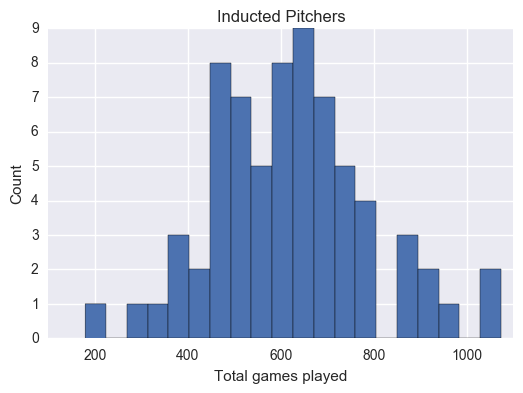

In [409]:
inducted_pitchers = inducted_players[inducted_players.Position == 'P']
plot_total_games(inducted_pitchers, "Inducted Pitchers", bins=20)

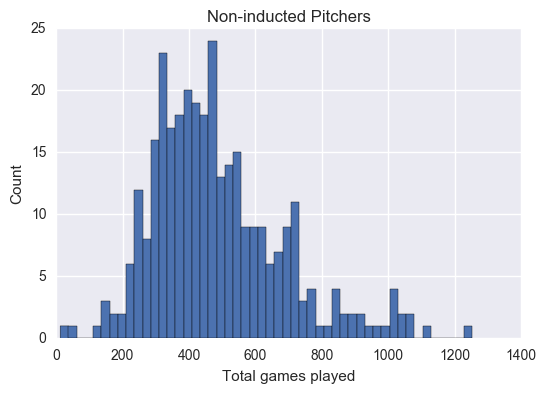

In [410]:
non_inducted_pitchers = non_inducted_players[non_inducted_players.Position == 'P']
plot_total_games(non_inducted_pitchers, "Non-inducted Pitchers")

In [411]:
display(inducted_pitchers['G_all'].describe())
display(non_inducted_pitchers['G_all'].describe())

count      69.000000
mean      623.550725
std       174.179044
min       179.000000
25%       493.000000
50%       619.000000
75%       709.000000
max      1073.000000
Name: G_all, dtype: float64

count     325.000000
mean      485.353846
std       198.713985
min        12.000000
25%       346.000000
50%       452.000000
75%       586.000000
max      1252.000000
Name: G_all, dtype: float64

### Non Pitchers

In [412]:
inducted_non_pitchers = inducted_players[inducted_players.Position != 'P']
non_inducted_non_pitchers = non_inducted_players[non_inducted_players.Position != 'P']

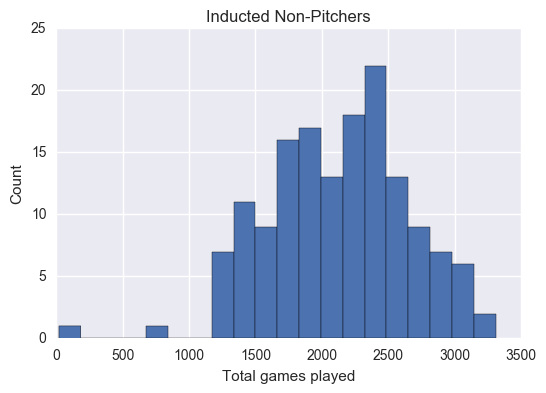

In [413]:
plot_total_games(inducted_non_pitchers, "Inducted Non-Pitchers", bins=20)

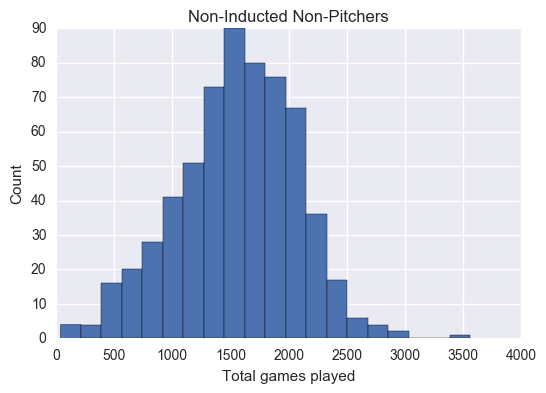

In [414]:
plot_total_games(non_inducted_non_pitchers, "Non-Inducted Non-Pitchers", bins=20)

In [417]:
nominated_players = inducted_players.append(non_inducted_players, ignore_index=True)

def convert_inducted_to_numeric(s):
    if s == 'Y':
        return 1
    else:
        return 0
    
nominated_players['inducted'] = nominated_players['inducted'].apply(convert_inducted_to_numeric)

,Games Played,Inducted
G_all,1.000000,0.256325
inducted,0.256325,1.000000


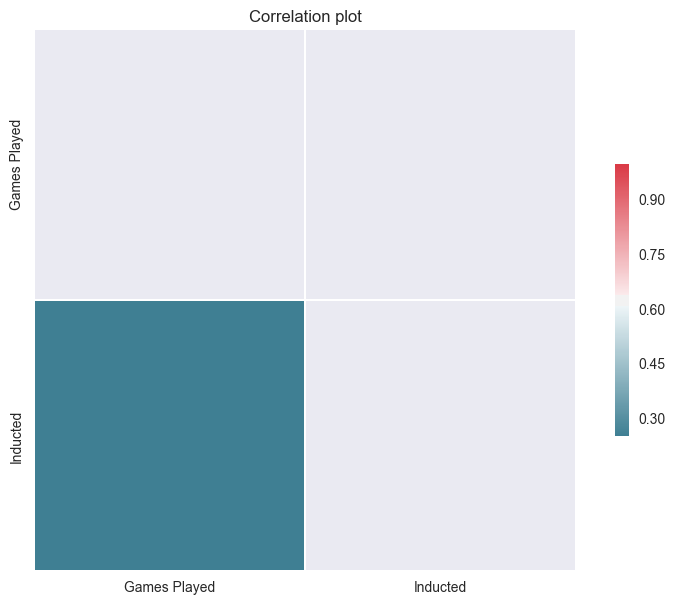

In [431]:
corr = nominated_players[['G_all', 'inducted']].corr()
corr.columns = ["Games Played", "Inducted"]
display(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

ax.set_title("Correlation plot");